In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.7.1+cu126'

In [6]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X +bias
X.shape
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [10]:
X[45:]

tensor([[0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [7]:
len(X)

50

In [13]:
train_split = int(0.8 *len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

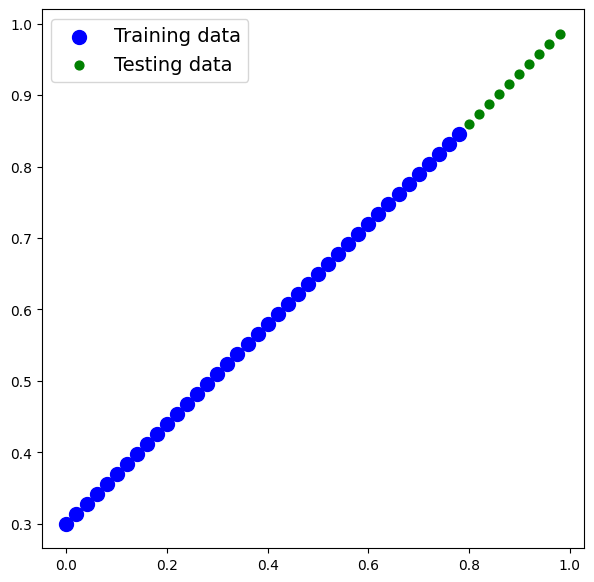

In [19]:
def plot_predictions (train_data=X_train, 
                      test_data=X_test, 
                      train_labels=y_train, 
                      test_labels=y_test, 
                      predictions=None):
    plt.figure(figsize=(7,7))
     # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=100, label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=40, label="Testing data")
    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})
    
plot_predictions()

In [22]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                dtype = torch.float,
                                                requires_grad=True))
        self.bias = nn.Parameter(torch.rand(1,
                                            dtype= torch.float, 
                                            requires_grad=True))
    
    def forward(self, x:torch.Tensor):
        return self.weights*x + self.bias
   
torch.manual_seed(42)
model = LinearRegressionModel()
model.weights , list(model.parameters()), model.state_dict()

(Parameter containing:
 tensor([0.3367], requires_grad=True),
 [Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.3904], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))]))

In [23]:
with torch.inference_mode():
    y_preds = model.forward(X_test)

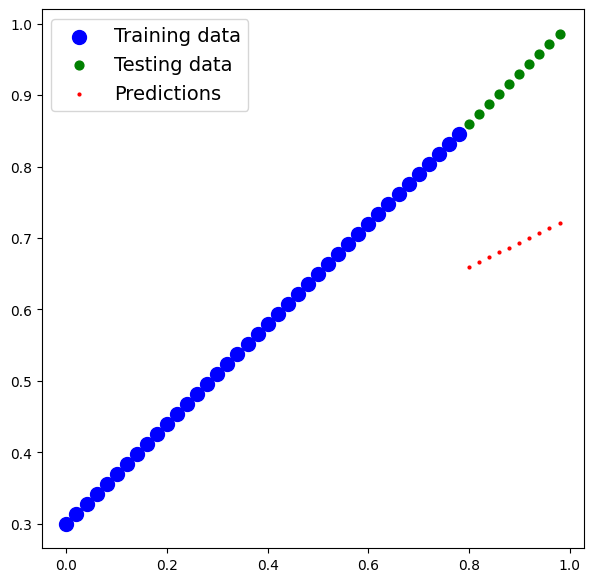

In [25]:
plot_predictions(predictions=y_preds)

In [26]:
y_test - y_preds

tensor([[0.2002],
        [0.2075],
        [0.2147],
        [0.2220],
        [0.2293],
        [0.2365],
        [0.2438],
        [0.2511],
        [0.2583],
        [0.2656]])

In [28]:
# Create the loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr= 0.01
)

In [35]:
from torch import inference_mode


torch.manual_seed(42)

epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training
    model.train()
    y_pred = model.forward(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    ### Testing
    with inference_mode():
        test_pred = model.forward(X_test)
        
    test_loss = loss_fn(test_pred,y_test.type(torch.float))
     # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.034646838903427124 | MAE Test Loss: 0.08051808178424835 
Epoch: 10 | MAE Train Loss: 0.031217509880661964 | MAE Test Loss: 0.0722455382347107 
Epoch: 20 | MAE Train Loss: 0.027778705582022667 | MAE Test Loss: 0.06397300213575363 
Epoch: 30 | MAE Train Loss: 0.024344902485609055 | MAE Test Loss: 0.05638733506202698 
Epoch: 40 | MAE Train Loss: 0.020913895219564438 | MAE Test Loss: 0.04811479523777962 
Epoch: 50 | MAE Train Loss: 0.017475087195634842 | MAE Test Loss: 0.03984225541353226 
Epoch: 60 | MAE Train Loss: 0.014042967930436134 | MAE Test Loss: 0.0322565920650959 
Epoch: 70 | MAE Train Loss: 0.010610274039208889 | MAE Test Loss: 0.02398405596613884 
Epoch: 80 | MAE Train Loss: 0.007171472068876028 | MAE Test Loss: 0.015711510553956032 
Epoch: 90 | MAE Train Loss: 0.003741039428859949 | MAE Test Loss: 0.008125847205519676 
Epoch: 100 | MAE Train Loss: 0.004964242689311504 | MAE Test Loss: 0.010411137714982033 
Epoch: 110 | MAE Train Loss: 0.00496424268

In [36]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6962]), 'bias': tensor([0.3064])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [38]:
with inference_mode():
    y_preds = model(X_test)

In [42]:
y_preds == test_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

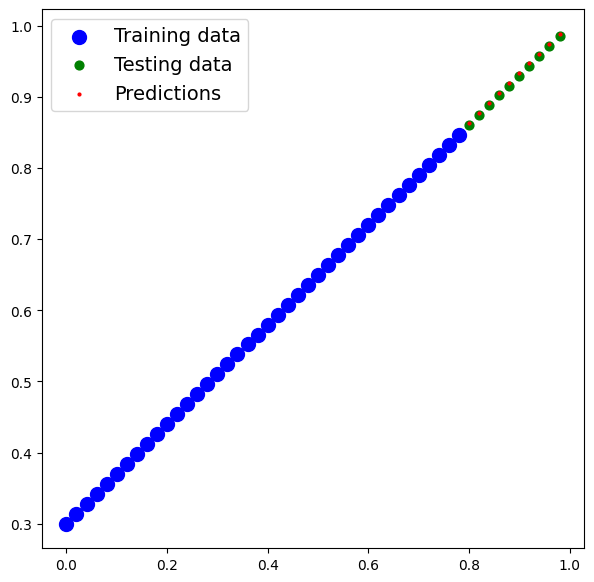

In [ ]:
plot_predictions(predictions= y_preds)

In [43]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_1.pth


In [48]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModel()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
# loaded_model_1.to(device="cpu")

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModel()
Model on device:
cpu


In [49]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## trial

In [2]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np

In [4]:
weight = 0.7
bias = 0.3

#create data

X = torch.arange(0,1, 0.02)
X

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [5]:
X = X.unsqueeze(dim=1)

In [ ]:
y = weight * X + bias

In [10]:
train_split = int(len(X)*0.8)
X_train , y_train, X_test, y_test = X[:train_split], y[:train_split], X[train_split:], y[train_split:]

In [40]:
def generate_plot(X_train = X_train, y_train= y_train, X_test=X_test, y_test=y_test, predictions=None):
    plt.figure(figsize=(10,10))
    
    plt.scatter(X_train, y_train, s=20, c='g')
    
    if predictions is not None:
        plt.scatter(X_test, predictions, s=10, c='b')
    plt.scatter(X_test, y_test, s=10, c='r')
    
    plt.show()

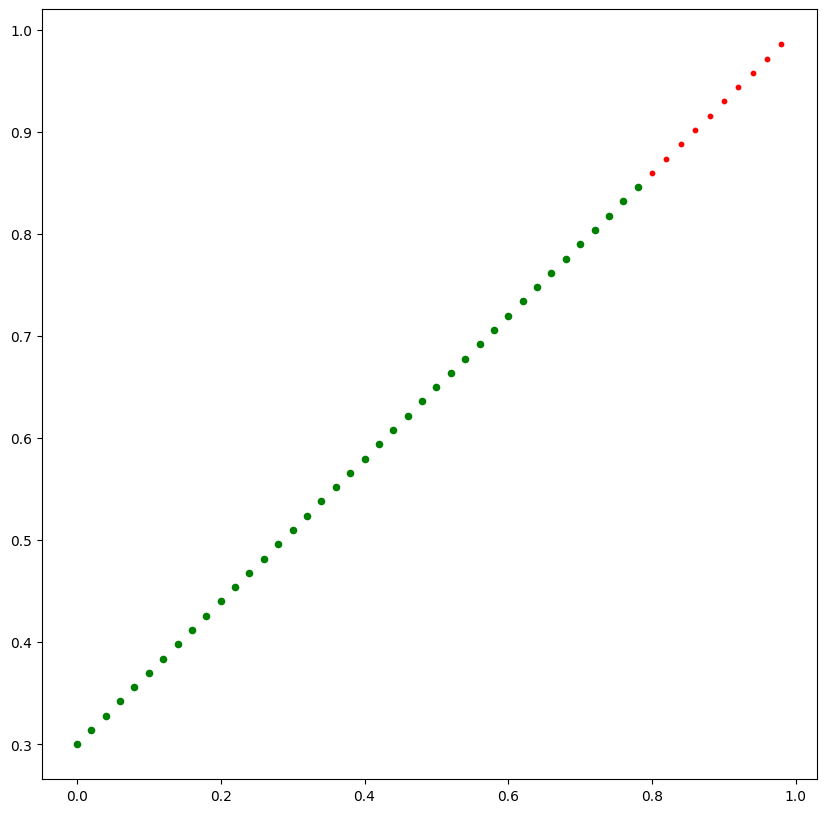

In [21]:
generate_plot()

In [22]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [25]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(1,
                                              requires_grad=True,
                                              dtype= torch.float
                                              ))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float
                                            ))
    def forward(self, X:torch.Tensor):
        return self.weight*X + self.bias

In [47]:
torch.manual_seed(42)
model = LinearRegressionModel()

In [48]:
list(model.parameters()), model.state_dict()

([Parameter containing:
  tensor([0.8823], requires_grad=True),
  Parameter containing:
  tensor([0.9150], requires_grad=True)],
 OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))]))

In [49]:
with torch.inference_mode():
    y_pred= model(X_test)

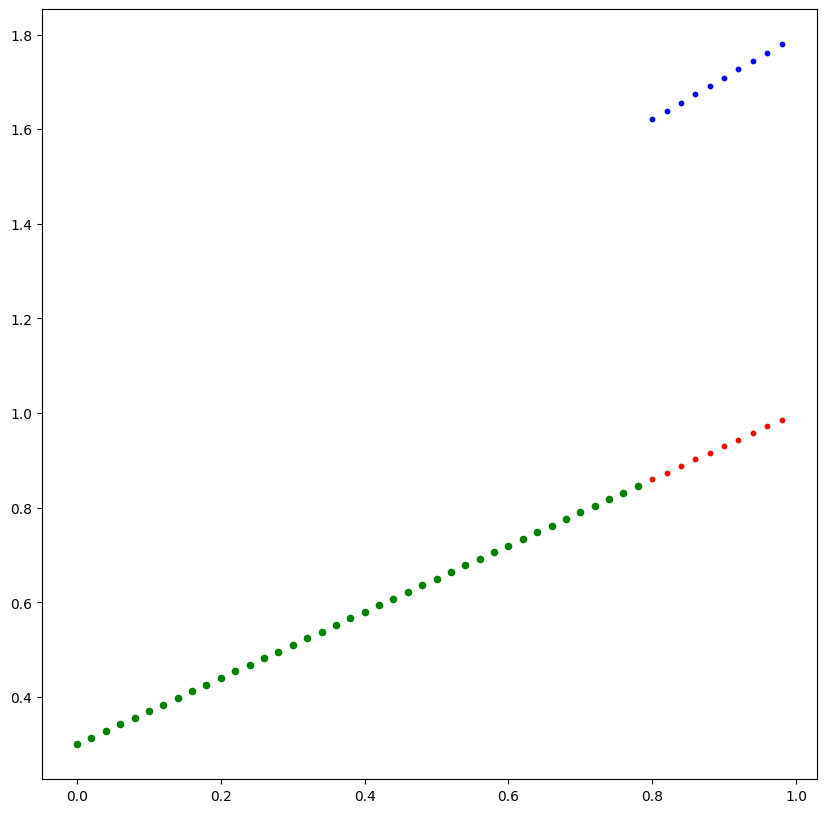

In [50]:
generate_plot(predictions = y_pred)

In [54]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(lr = 0.01,
                            params = model.parameters(),)

In [57]:
epochs = 100
train_loss_values =[]
test_loss_values =[]
epoch_count = []
for epoch in range(epochs):
    model.train()
    y_pred= model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    
    with torch.inference_mode():
        test_pred = model(X_test)
        
    test_loss = loss_fn(test_pred, y_test,)
    
    if epoch % 10 ==0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

    
    

Epoch: 0 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 
Epoch: 10 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 
Epoch: 20 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 
Epoch: 30 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 
Epoch: 40 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 
Epoch: 50 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 
Epoch: 60 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 
Epoch: 70 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 
Epoch: 80 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 
Epoch: 90 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 


In [61]:
list(model.parameters())

[Parameter containing:
 tensor([0.6977], requires_grad=True),
 Parameter containing:
 tensor([0.3080], requires_grad=True)]

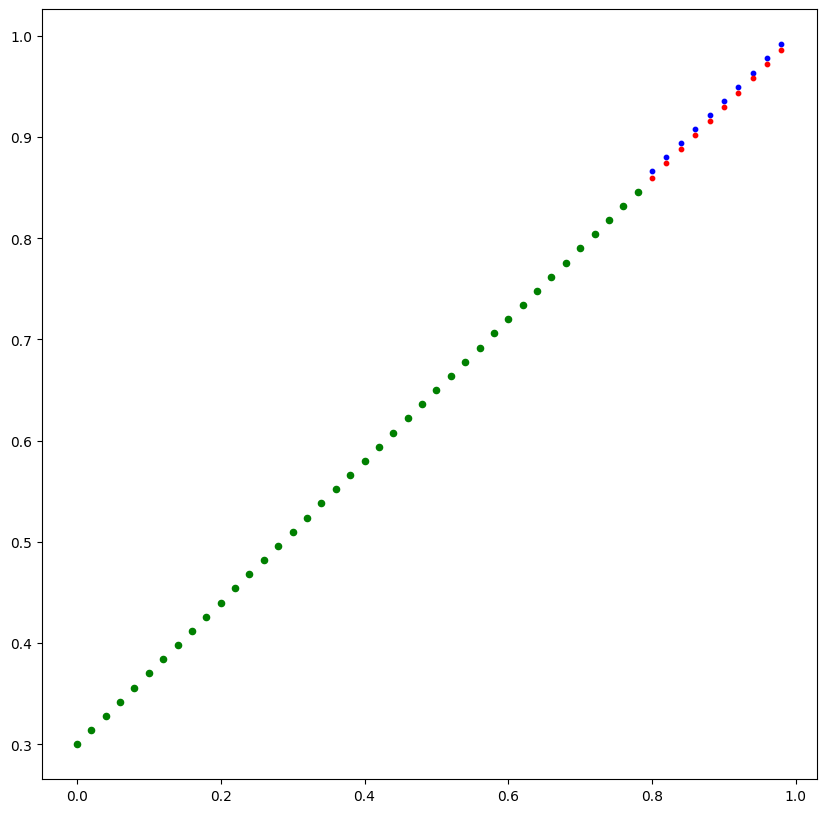

In [60]:
with torch.inference_mode():
    y_pred = model(X_test)
    
generate_plot(predictions= y_pred)

In [62]:
torch.save(obj=model.state_dict(),
           f='model_Linear.pth')

In [63]:
model_1 = LinearRegressionModel()

model_1.load_state_dict(torch.load(f='model_Linear.pth'))

<All keys matched successfully>

In [66]:
with torch.inference_mode():
    y_prid = model_1(X_test)
    

In [67]:
y_prid == y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])